In [1]:
from compare import *
from packages import *

## Plot the accumulated precipitation in WSM6 scheme for 2022 water year.

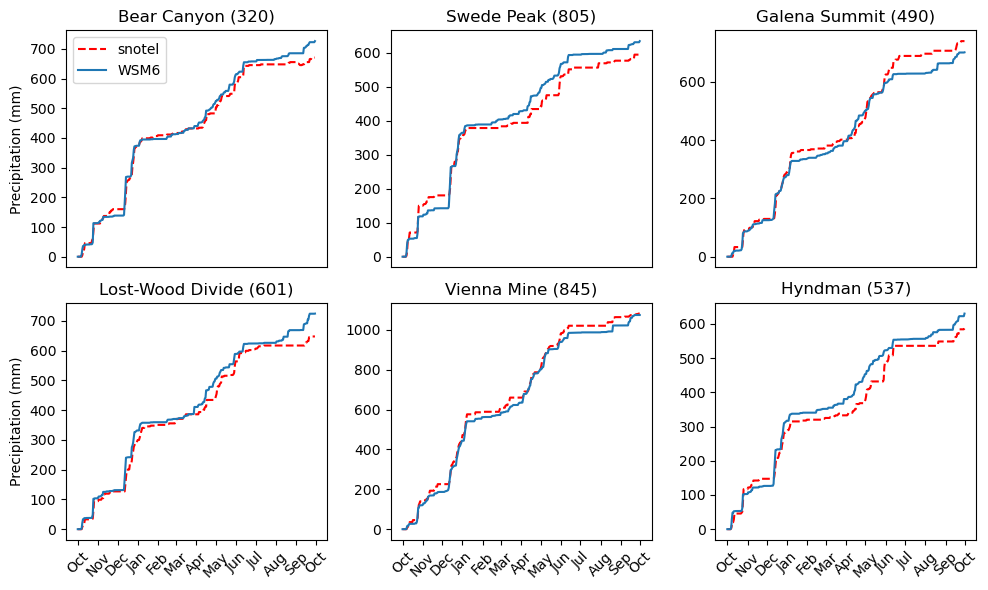

In [2]:
path = '/bsuhome/stanleyakor/Python-tutorial/wrf-python/'
path_2_wy_file = '/bsuhome/stanleyakor/wateryear_2022/'
path_geog_file= '/bsuhome/stanleyakor/scratch/WY_22_THOMPSON/wrfout_d02_2021-09-29_00:00:00'

wsm6_scheme = precip_snotel('PRCP',path+'NRCS_SNOTEL_Locations_noAlaska.csv',\
            path+'temp1',path_geog_file,path_2_wy_file+'WSM6_22_daily.nc', 'WSM6_TEST', save = False)

wsm6_scheme.compare_smallest()

## Plot the accumulated precipitation over a select station, for all the microphysics schemes.

In [3]:
All_schemes = {
    'Morrison': path_2_wy_file + 'MORRISON_22_daily.nc',
    'WDM6': path_2_wy_file + 'WDM6_22_daily.nc',
    'Thompson': path_2_wy_file + 'Thompson_22_daily.nc'
    }


In [4]:
schemes = CompareScheme('PRCP',path+'NRCS_SNOTEL_Locations_noAlaska.csv',\
            path+'temp1',path_geog_file,path_2_wy_file+'WSM6_22_daily.nc', 'precip_comp','WSM6', save = True)


Keys in sub-dictionary 'Morrison' do not match.


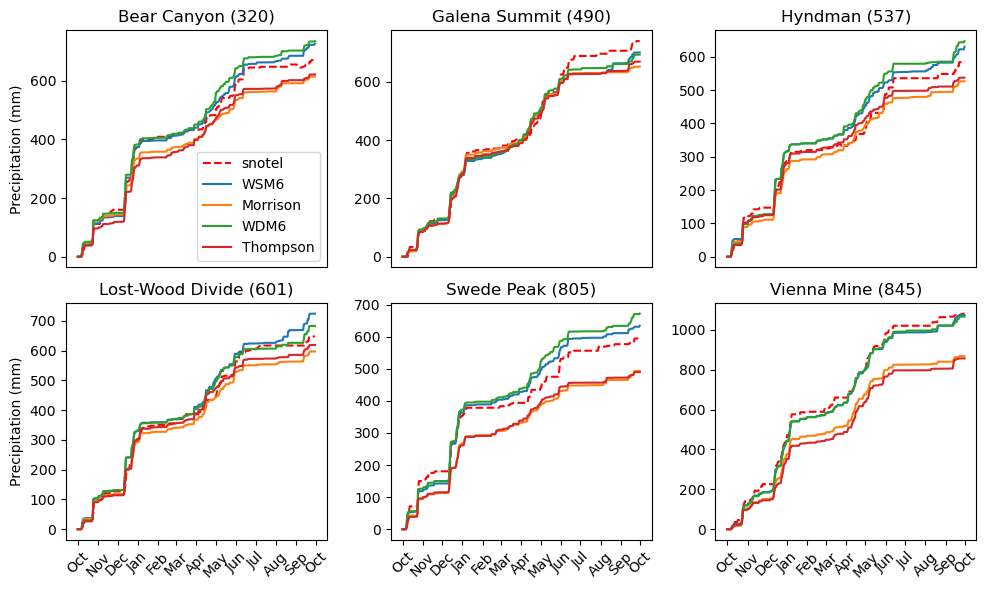

In [5]:
schemes.smallest(All_schemes)

## How do these schemes estimate snow water equivalent and snow height during the peak of accumulation season (April 1)?

1) Snow Height

In [6]:
## collect snoda file for april 1 and regrid to wrf resolution
snodas_path = path + 'SNWZ_nonan_snodas_WY_22.nc'
snodas_file = regrid_snodas(path_geog_file, snodas_path, 'SNWZ', multiple_time = False)


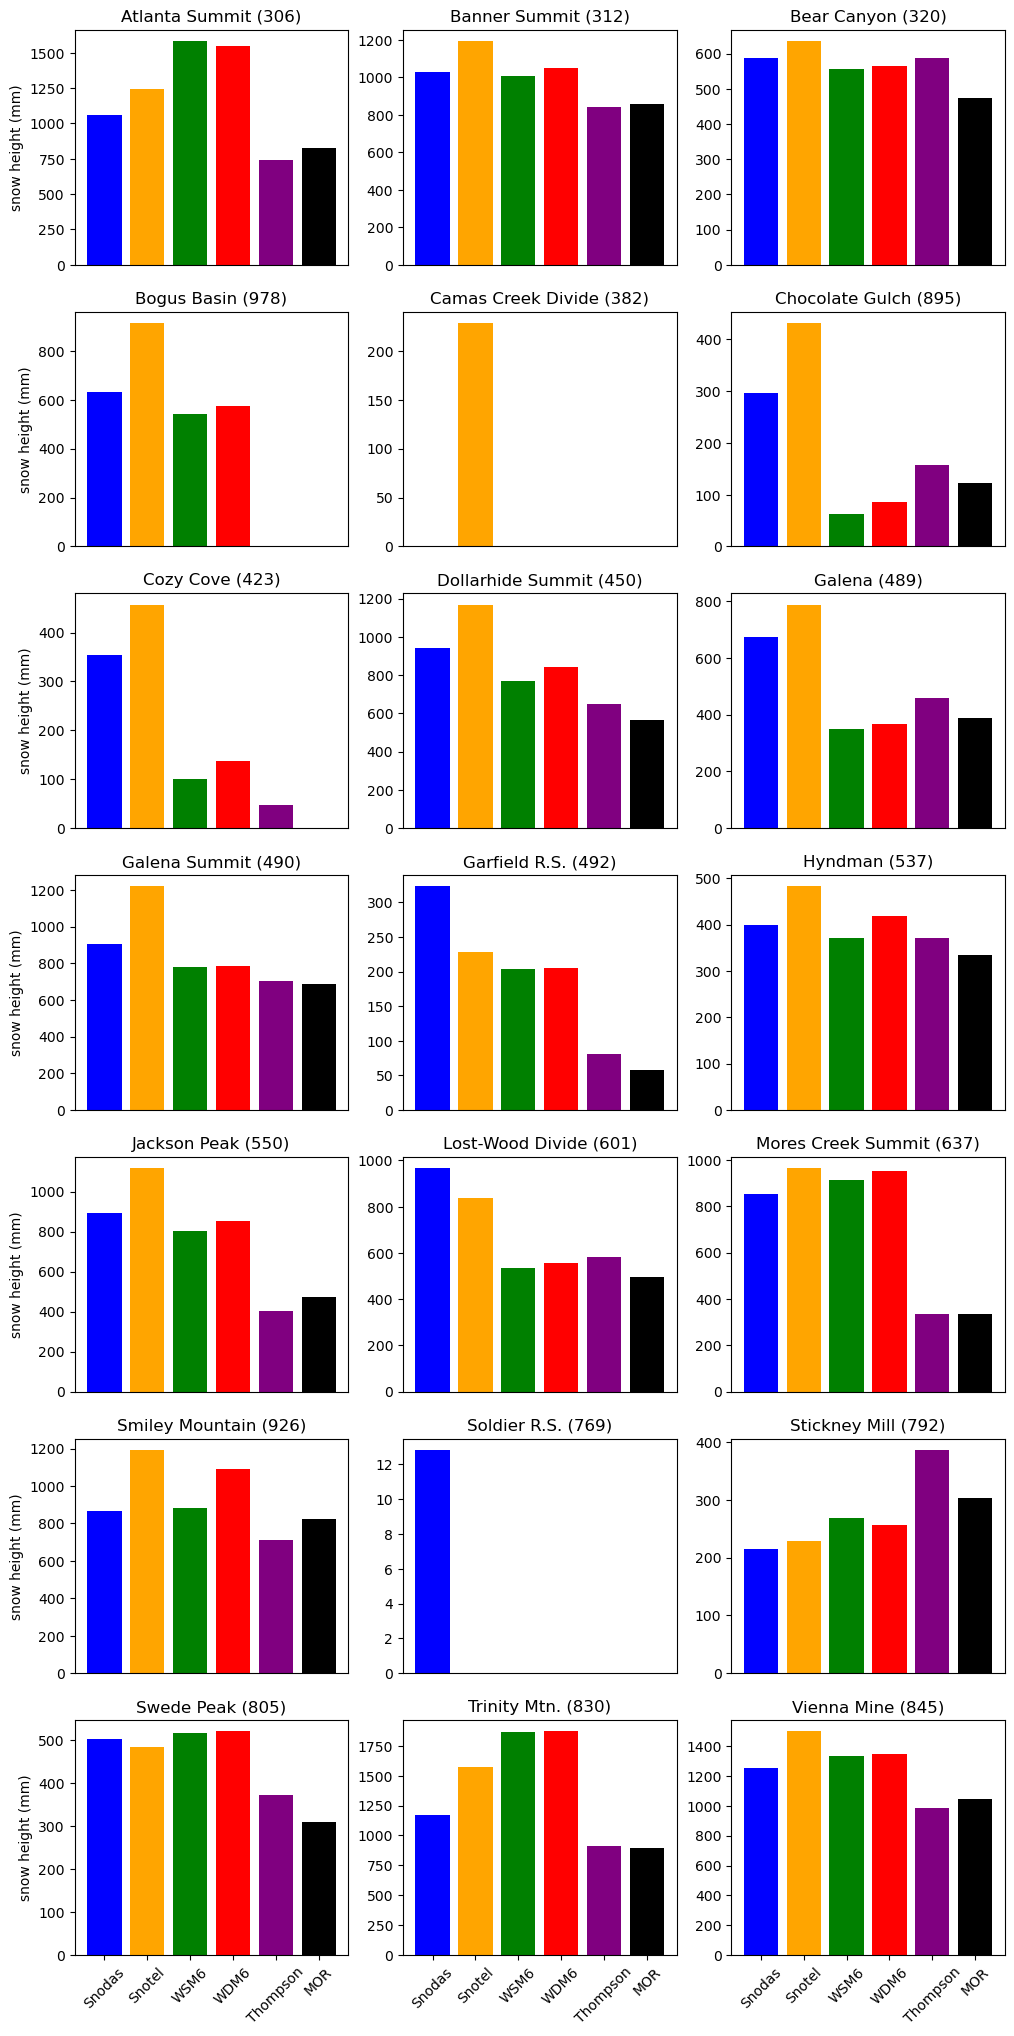

In [7]:

histogram = hist('PRCP',path+'NRCS_SNOTEL_Locations_noAlaska.csv',\
            path+'temp2',path_geog_file,path_2_wy_file+'WSM6_22_daily.nc', 'station_sh_compare','WSM6', snodas_file,case='snowh',save = True)


histogram.make_plots(All_schemes,'snow height (mm)')

 2) SWE

In [8]:
## collect snoda file for april 1 and regrid to wrf resolution
snodas_path = path + 'SWE_nonan_snodas_WY_22.nc'
snodas_file_swe = regrid_snodas(path_geog_file, snodas_path, 'SWE', multiple_time = False)


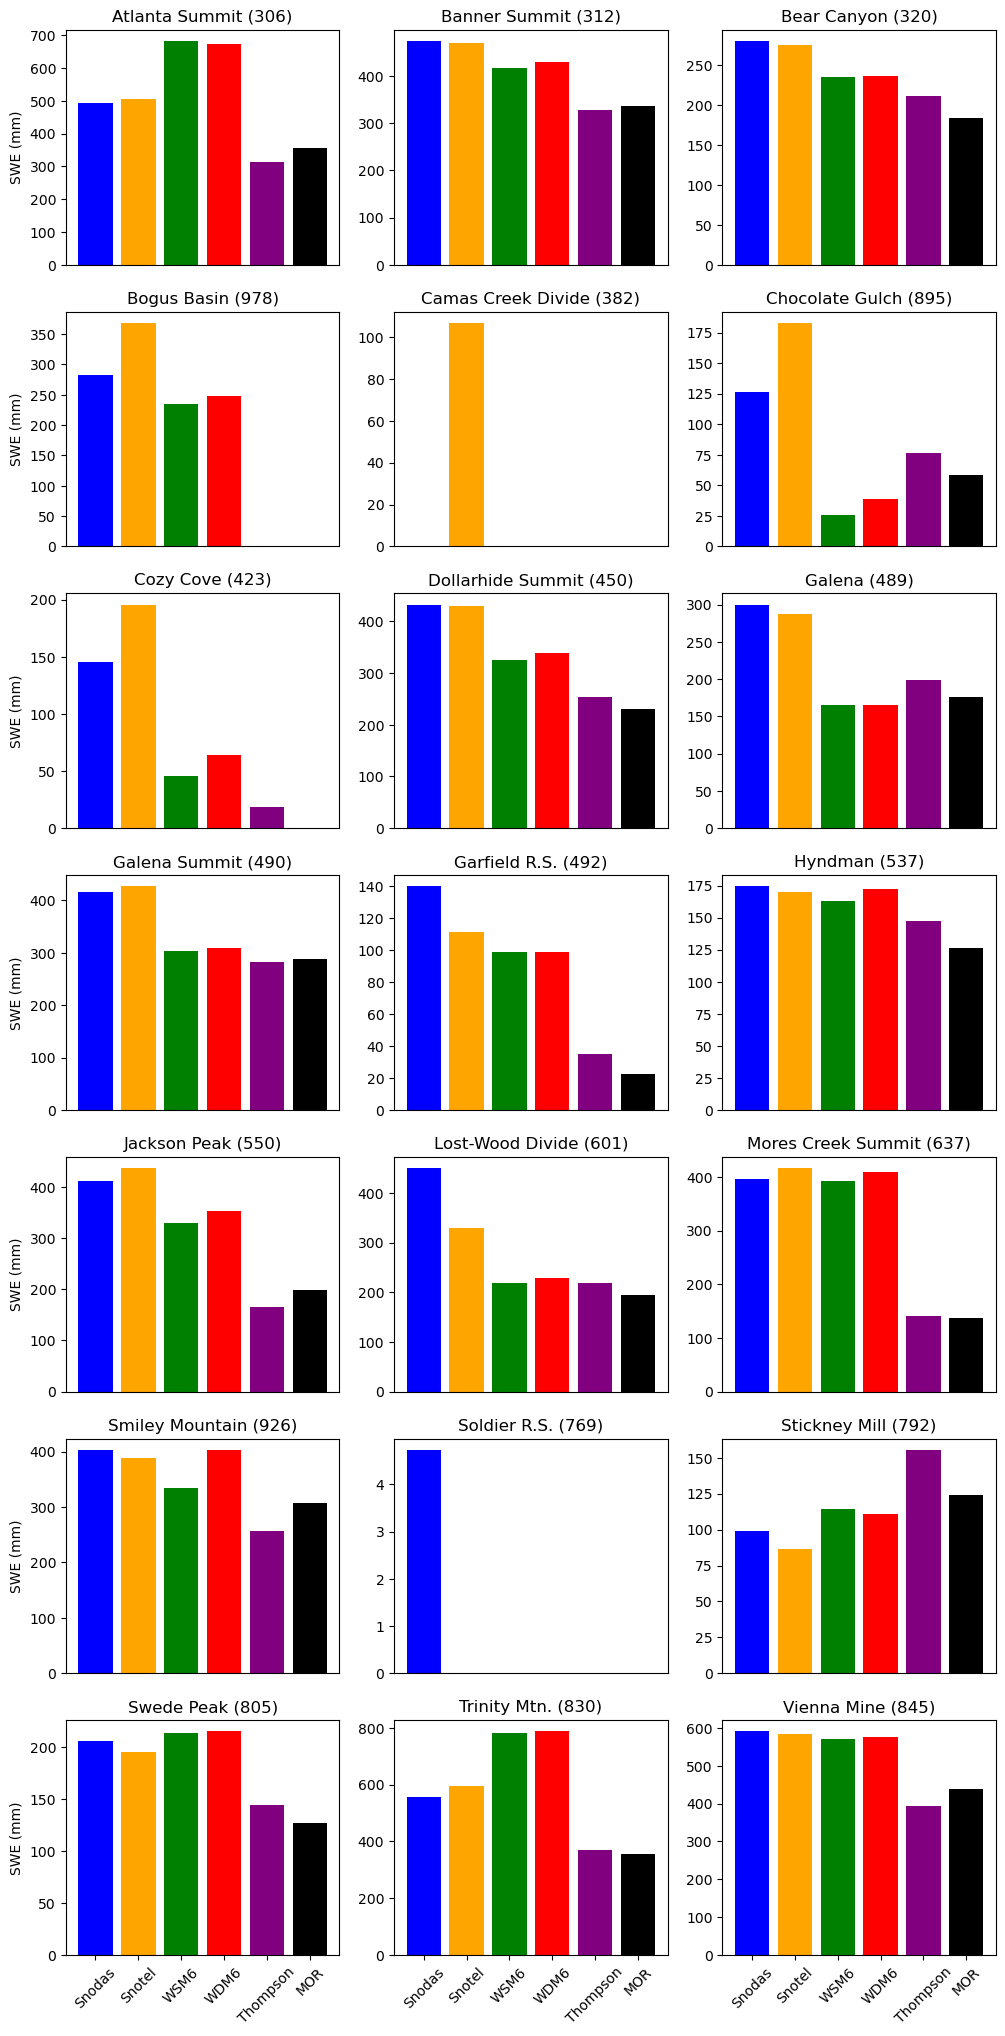

In [9]:

histogram = hist('PRCP',path+'NRCS_SNOTEL_Locations_noAlaska.csv',\
            path+'temp2',path_geog_file,path_2_wy_file+'WSM6_22_daily.nc', 'station_swe_comp','WSM6', snodas_file_swe,case='swe',save = True)


histogram.make_plots(All_schemes,'SWE (mm)')

In [10]:
corr = station_corr('PRCP',path+'NRCS_SNOTEL_Locations_noAlaska.csv',\
            path+'temp2',path_geog_file,path_2_wy_file+'WSM6_22_daily.nc', 'precip_comp','WSM6', save = True)


In [11]:
corr.make(All_schemes, type = 'NSE')

In [14]:
precip = pd.read_csv('precip_station_data.csv')
swe = pd.read_csv('swe_station_data.csv')
swh = pd.read_csv('swh_station_data.csv')

In [16]:
precip


,Name,WSM6_NSE,WDM6_NSE,Thompson_NSE,Morrison_NSE
0,Atlanta Summit (306),0.318432,0.387262,0.830935,0.920849
1,Banner Summit (312),0.960632,0.968905,0.877584,0.908633
2,Bear Canyon (320),0.988957,0.971021,0.936044,0.938414
3,Bogus Basin (978),0.574297,0.406746,0.642595,0.705830
4,Camas Creek Divide (382),0.650826,0.809730,0.573878,0.649558
5,Chocolate Gulch (895),0.924023,0.930056,0.952352,0.930416
6,Cozy Cove (423),0.921740,0.958719,0.836213,0.941013
7,Dollarhide Summit (450),0.229136,0.130063,0.924917,0.962919
8,Galena (489),0.977091,0.980559,0.992325,0.990563
9,Galena Summit (490),0.978247,0.984519,0.972769,0.971668


In [17]:
swe


,Name,WSM6_NSE,WDM6_NSE,Thompson_NSE,Morrison_NSE
0,Atlanta Summit (306),0.367979,0.360421,0.782288,0.915828
1,Banner Summit (312),0.632273,0.607557,0.702317,0.690760
2,Bear Canyon (320),0.842719,0.772675,0.857622,0.862512
3,Bogus Basin (978),0.824555,0.863689,-0.341148,-0.266566
4,Camas Creek Divide (382),0.735517,0.724253,0.330580,0.376579
5,Chocolate Gulch (895),0.586066,0.602133,0.804531,0.705362
6,Cozy Cove (423),0.845257,0.893671,0.671475,0.686729
7,Dollarhide Summit (450),0.870624,0.849696,0.725585,0.640930
8,Galena (489),0.872923,0.871903,0.937029,0.919895
9,Galena Summit (490),0.812233,0.825946,0.780543,0.818812


In [18]:
swh

,Name,WSM6_NSE,WDM6_NSE,Thompson_NSE,Morrison_NSE
0,Atlanta Summit (306),0.620439,0.621695,0.780569,0.881547
1,Banner Summit (312),0.630302,0.615947,0.680853,0.674067
2,Bear Canyon (320),0.855782,0.797817,0.837162,0.839433
3,Bogus Basin (978),0.880503,0.901836,-0.171866,-0.068862
4,Camas Creek Divide (382),0.818688,0.809372,0.499529,0.541854
5,Chocolate Gulch (895),0.678820,0.686825,0.811198,0.757301
6,Cozy Cove (423),0.864938,0.889987,0.739457,0.753197
7,Dollarhide Summit (450),0.840003,0.826306,0.733718,0.674153
8,Galena (489),0.776839,0.770800,0.860063,0.855719
9,Galena Summit (490),0.795760,0.806685,0.772575,0.805025
